### HOMEWORK

- 1. Reimplement the NeuralNetwork class by using the Perceptron class inside it (e.g. a layer is an array of perceptrons). Inside the class extract weights and other info from the Perceptrons to allow vector-matrix efficient multiplications
- 2. (BONUS) make everything not using matrix multiplications, but rather for loops iterating over list of Perceptrons

#### Import librerie necessarie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(42)

### Generazione del dataset (copy by lesson 24-03)

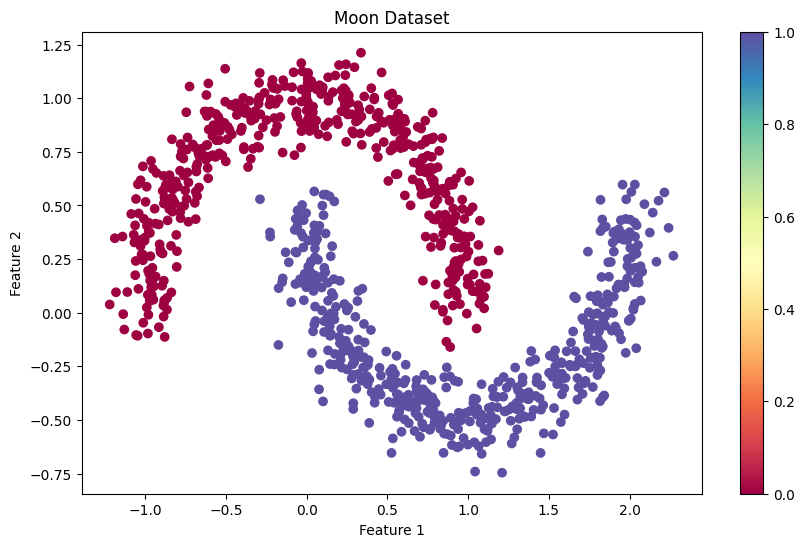

In [2]:
# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Le due classi viste a lezione erano:

- 1.
 ```
class Perceptron:
    def __init__(self, input_size, activation_function):
        # Initialize weights and bias with random values
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.activation_function = activation_function
        
    def activate(self, x):
        # Compute weighted sum of inputs
        z = np.dot(x, self.weights) + self.bias
        print(z)
        print(self.weights)
        print(self.activation_function(z))
        # Apply step activation function
        #return 1 if z > 0 else 0
        return self.activation_function(z)
```

- 2. 
```
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivative of ReLU"""
        return np.where(x > 0, 1, 0)
    
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        """Forward propagation"""
        # First layer (input -> hidden)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Second layer (hidden -> output)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        return loss
    
    def backward(self, X, y):
        """Backward propagation to compute gradients"""
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        """Update weights and biases using gradient descent"""
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X, y, learning_rate=0.1, epochs=1000, print_every=100):
        """Train the neural network"""
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y.reshape(-1, 1), y_pred)
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)
            
            # Print progress
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X, threshold=0.5):
        """Make binary predictions"""
        y_pred = self.forward(X)
        return (y_pred >= threshold).astype(int)
```
 

### 1. 



### Classe Perceptron modificata

Ho esteso la classe Perceptron esistente aggiungendo metodi getter e setter per accedere e modificare pesi e bias.

get_weights() e get_bias(): per ottenere i parametri

set_weights() e set_bias(): per aggiornare i parametri

Ho moltiplicato i pesi iniziali per 0.01 per allinearli alla pratica della classe NeuralNetwork originale.


In [3]:
class Perceptron:
    def __init__(self, input_size, activation_function):
        # Inizializza pesi e bias con valori casuali
        self.weights = np.random.randn(input_size) * 0.01  # Moltiplico per 0.01 per uniformità
        self.bias = np.random.randn() * 0.01
        self.activation_function = activation_function
        self.last_activation = None  # Inizializza last_activation a None

    def activate(self, x):
        # Calcola la somma pesata degli input
        z = np.dot(x, self.weights) + self.bias
        # Calcola l'attivazione e la memorizza in last_activation
        self.last_activation = self.activation_function(z)  # Salva il risultato dell'attivazione
        return self.last_activation

    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias
    
    def set_weights(self, weights):
        self.weights = weights
        
    def set_bias(self, bias):
        self.bias = bias


###   Classe Neural Network With Perceptrons

**Inizializzazione:**

Creo un array di perceptron per lo strato nascosto, ognuno con la funzione ReLU come attivazione.

Creo un array di perceptron per lo strato di output, ognuno con la funzione sigmoid come attivazione.


**Gestione dei pesi:**

extract_weights_and_biases(): Estrae i pesi e i bias dai singoli perceptron e li organizza in matrici (W1, b1, W2, b2) per calcoli efficienti.

update_perceptrons_from_matrices(): Aggiorna i perceptron con i nuovi pesi e bias dopo ogni aggiornamento.


**Retropropagazione e addestramento:**

Simile all'implementazione originale, ma estrae e aggiorna i pesi dai perceptron.



**Vantaggi di questa implementazione:**

Modularità: Ogni neurone è un oggetto perceptron separato.

Mantenimento dell'efficienza: Quando necessario, estraiamo pesi e bias in formato matriciale per calcoli veloci.

Trasparenza: La struttura della rete è chiara, con ciascun perceptron che rappresenta un neurone.

In [4]:
class NeuralNetworkWithPerceptrons:
    def __init__(self, input_size, hidden_size, output_size):
        # Funzioni di attivazione
        self.relu = lambda x: np.maximum(0, x)
        self.sigmoid = lambda x: 1 / (1 + np.exp(-np.clip(x, -500, 500)))
        
        # Crea i perceptron per lo strato nascosto
        self.hidden_layer = []
        for _ in range(hidden_size):
            self.hidden_layer.append(Perceptron(input_size, self.relu))
        
        # Crea i perceptron per lo strato di output
        self.output_layer = []
        for _ in range(output_size):
            self.output_layer.append(Perceptron(hidden_size, self.sigmoid))
        
        # Variabili per memorizzare valori intermedi durante il forward pass
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        
        # Salva le dimensioni per uso futuro
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
    
    def extract_weights_and_biases(self):
        """Estrae pesi e bias dai perceptron in formato matriciale efficiente"""
        # Estrai pesi e bias dallo strato nascosto
        W1 = np.zeros((self.input_size, self.hidden_size))
        b1 = np.zeros((1, self.hidden_size))
        
        for i, perceptron in enumerate(self.hidden_layer):
            W1[:, i] = perceptron.get_weights()
            b1[0, i] = perceptron.get_bias()
        
        # Estrai pesi e bias dallo strato di output
        W2 = np.zeros((self.hidden_size, self.output_size))
        b2 = np.zeros((1, self.output_size))
        
        for i, perceptron in enumerate(self.output_layer):
            W2[:, i] = perceptron.get_weights()
            b2[0, i] = perceptron.get_bias()
        
        return W1, b1, W2, b2
    
    def update_perceptrons_from_matrices(self, W1, b1, W2, b2):
        """Aggiorna i pesi e bias dei perceptron dalle matrici"""
        # Aggiorna lo strato nascosto
        for i, perceptron in enumerate(self.hidden_layer):
            perceptron.set_weights(W1[:, i])
            perceptron.set_bias(b1[0, i])
        
        # Aggiorna lo strato di output
        for i, perceptron in enumerate(self.output_layer):
            perceptron.set_weights(W2[:, i])
            perceptron.set_bias(b2[0, i])
    
    def forward(self, X):
        """Forward propagation con calcoli matriciali efficienti"""
        # Estrai pesi e bias in formato matriciale
        W1, b1, W2, b2 = self.extract_weights_and_biases()
        
        # Primo strato (input -> hidden)
        self.z1 = np.dot(X, W1) + b1
        self.a1 = np.maximum(0, self.z1)  # ReLU
        
        # Secondo strato (hidden -> output)
        self.z2 = np.dot(self.a1, W2) + b2
        self.a2 = 1 / (1 + np.exp(-np.clip(self.z2, -500, 500)))  # Sigmoid
        
        return self.a2
    
   
    
    def relu_derivative(self, x):
        """Derivata di ReLU"""
        return np.where(x > 0, 1, 0)
    
    def sigmoid_derivative(self, x):
        """Derivata della funzione sigmoid"""
        s = 1 / (1 + np.exp(-np.clip(x, -500, 500)))
        return s * (1 - s)
    
    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        return loss
    
    def backward(self, X, y):
        """Backward propagation per calcolare i gradienti"""
        m = X.shape[0]
        W1, b1, W2, b2 = self.extract_weights_and_biases()
        
        # Gradiente dello strato di output
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Gradiente dello strato nascosto
        dz1 = np.dot(dz2, W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        """Aggiorna i parametri usando la discesa del gradiente"""
        # Estrai i pesi e bias attuali
        W1, b1, W2, b2 = self.extract_weights_and_biases()
        
        # Aggiorna i pesi e i bias
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        # Aggiorna i perceptron con i nuovi pesi e bias
        self.update_perceptrons_from_matrices(W1, b1, W2, b2)
    
    def train(self, X, y, learning_rate=0.1, epochs=1000, print_every=100):
        """Addestra la rete neurale"""
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Calcola la loss
            loss = self.compute_loss(y.reshape(-1, 1), y_pred)
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y)
            
            # Aggiorna i parametri
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)
            
            # Stampa il progresso
            if epoch % print_every == 0:
                print(f"Epoca {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X, threshold=0.5):
        """Effettua predizioni binarie"""
        y_pred = self.forward(X)
        return (y_pred >= threshold).astype(int)

In [5]:
# Training
# set hyperparameters
hidden_size = 100
learning_rate = 0.3
epochs = 2000


# Create a neural network  (matrici)
nn_matrix = NeuralNetworkWithPerceptrons(input_size=2, hidden_size=hidden_size, output_size=1)
# Train the network (con matrici)
losses_matrix = nn_matrix.train(X, y, learning_rate=learning_rate, epochs=epochs, print_every=100)


Epoca 0, Loss: 0.6933
Epoca 100, Loss: 0.2738
Epoca 200, Loss: 0.2524
Epoca 300, Loss: 0.2515
Epoca 400, Loss: 0.2511
Epoca 500, Loss: 0.2505
Epoca 600, Loss: 0.2491
Epoca 700, Loss: 0.2461
Epoca 800, Loss: 0.2398
Epoca 900, Loss: 0.2289
Epoca 1000, Loss: 0.2124
Epoca 1100, Loss: 0.1885
Epoca 1200, Loss: 0.1564
Epoca 1300, Loss: 0.1226
Epoca 1400, Loss: 0.0937
Epoca 1500, Loss: 0.0712
Epoca 1600, Loss: 0.0512
Epoca 1700, Loss: 0.0394
Epoca 1800, Loss: 0.0321
Epoca 1900, Loss: 0.0271


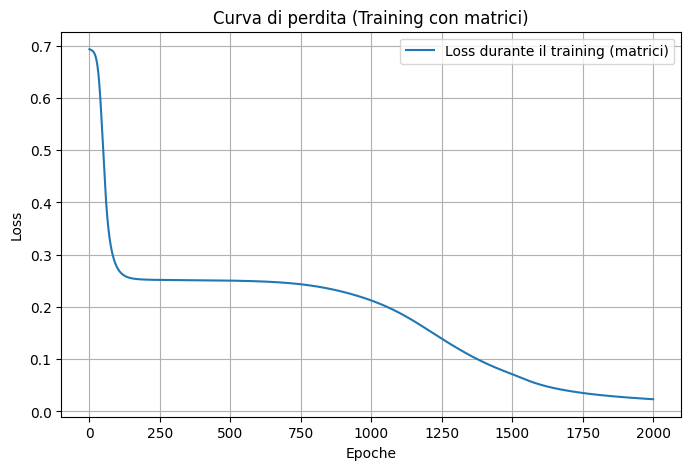

In [6]:
# Visualizzare la curva di perdita
plt.figure(figsize=(8, 5))
plt.plot(losses_matrix, label='Loss durante il training (matrici)')
plt.title('Curva di perdita (Training con matrici)')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [7]:
# Make predictions on test set
y_pred = nn_matrix.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 1.0000


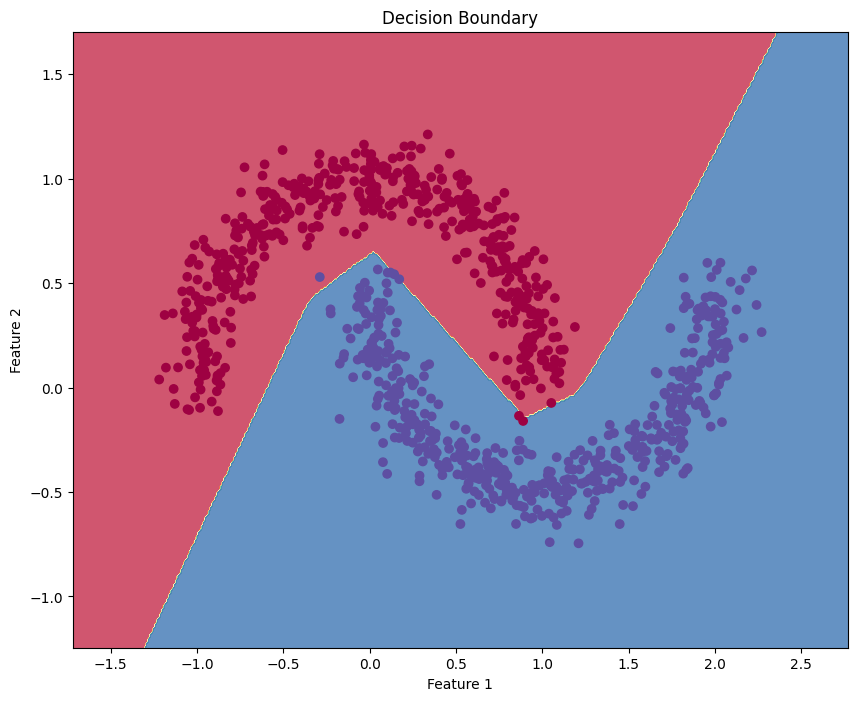

In [8]:
def plot_decision_boundary(X, y, model):
    """Plot the decision boundary of the trained model"""
    # Set min and max values with some margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Generate a grid of points
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, nn_matrix)